[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/timpdotd/LabIAGI_1950722/tree/408d4077a2ed2906ba3a3145586fc761e9f4380e/Esercitazione_5)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1N4QnSuNfyiiuIGcHpuhdxE90hmheuulT?usp=sharing)


This Exercise is designed for the understanding of the usage of the basic packages and the concepts of Machine learning basics such as feature selection, Exploratory Data Analysis, Test-train split, some funtions for implementing simple linear regression and multiple linear regression.

## Import Libraries
Import the necessary libraries for Data Analysis (Pandas, Numpy), Plotting (Matplotlib, Seaborn) and Machine Learning (Scikit-Learn)

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset
If you are using colab, download the `auto-mpg.csv` from GitHub and upload into the runtime using the `upload` icon in the side bar of your colab.

Use the `read_csv()` function of pandas to load the data into the dataframe.

In [ ]:
url = 'https://raw.githubusercontent.com/timpdotd/LabIAGI_1950722/main/Esercitazione_5/data/auto-mpg/auto-mpg.csv'

df = pd.read_csv(url)

## Exploratory Data Analysis

Exploratory Data Analysis is an essential step in any machine learning or data analysis project. It helps us to understand the data and its underlying structure, identify patterns, relationships, and potential problems in the data. EDA also helps us to make informed decisions about data preprocessing, feature selection, and model building.

### Basic statistical analysis of the dataset

Once we have loaded the dataset, we can perform basic statistical analysis of the data using functions like describe(), info(), etc. These functions provide information about the data such as the number of rows, columns, data types, mean, standard deviation, minimum, maximum, etc.

Display the number of rows and columns of the dataset using the `shape` attribute of the dataframe.

Note: The shape is a tuple of (rows,columns), excluding the header.

In [ ]:
df.shape

(318, 9)

Display the first 5 rows of the dataset using the `head()` function of pandas.

In [ ]:
df.head()

,MPG,CYL,DIS,HP,WGT,ACC,YR,ORG,NAME
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Display the data types of the columns using the `dtypes` attribute of the dataframe.

In [ ]:
df.dtypes

MPG     float64
CYL       int64
DIS     float64
HP      float64
WGT     float64
ACC     float64
YR        int64
ORG       int64
NAME     object
dtype: object

Check the basic information about the dataset using the `info()` function of pandas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPG     318 non-null    float64
 1   CYL     318 non-null    int64  
 2   DIS     318 non-null    float64
 3   HP      316 non-null    float64
 4   WGT     318 non-null    float64
 5   ACC     318 non-null    float64
 6   YR      318 non-null    int64  
 7   ORG     318 non-null    int64  
 8   NAME    318 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 22.5+ KB


Display basic statistics of the dataset using the `describe()` function of pandas.

In [ ]:
df.describe()

,MPG,CYL,DIS,HP,WGT,ACC,YR,ORG
count,318.000000,318.000000,318.000000,316.000000,318.000000,318.000000,318.000000,318.000000
mean,21.383333,5.738994,210.190252,110.297468,3096.578616,15.317296,74.720126,1.474843
std,6.692489,1.746864,108.164260,39.929066,878.263884,2.751332,2.943255,0.739381
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,16.000000,4.000000,108.000000,80.750000,2265.000000,13.500000,72.000000,1.000000
50%,20.100000,6.000000,200.000000,97.500000,2996.500000,15.200000,75.000000,1.000000
75%,26.000000,8.000000,304.000000,140.000000,3811.250000,17.000000,77.000000,2.000000
max,43.100000,8.000000,455.000000,230.000000,5140.000000,24.800000,80.000000,3.000000


### Data Visualization

Visualizing the data is an excellent way to gain insights into the data and identify patterns and relationships. There are different types of plots that we can use to visualize the data, such as scatter plots, histograms, box plots, etc.

(array([17., 64., 94., 37., 17., 47., 13., 14.,  5.,  8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

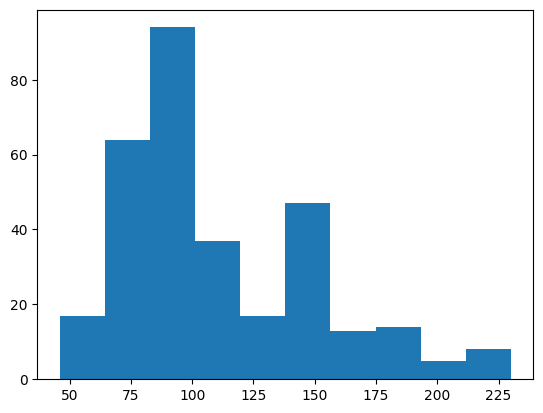

In [ ]:
plt.hist(df['HP'])

<Axes: xlabel='HP', ylabel='Count'>

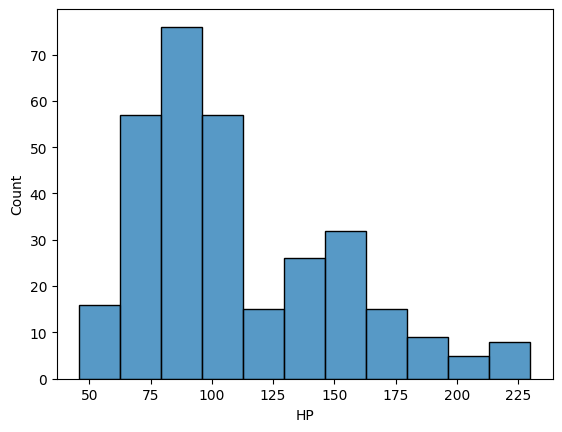

In [ ]:
sns.histplot(df['HP'])

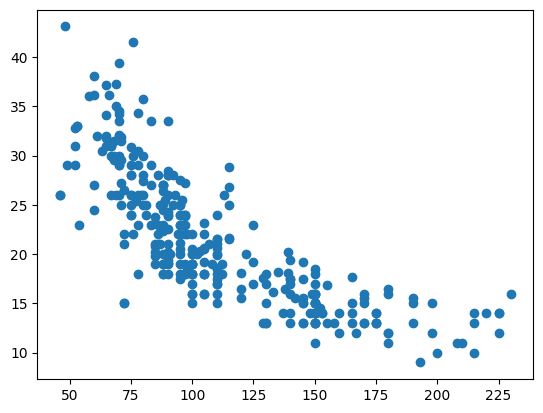

In [ ]:
plt.scatter(df['HP'], df['MPG'])

<Axes: ylabel='HP'>

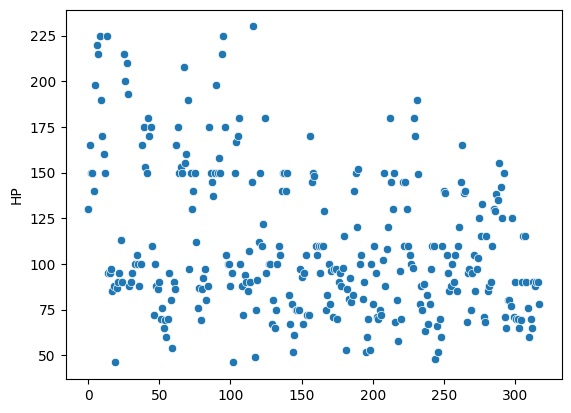

In [ ]:
sns.scatterplot(df['HP'])

To overview the distribution of the data, we can use the `pairplot()` function of pandas/seaborn. This function plots pairwise relationships in a dataset. It is a great way to visualize the relationship between multiple variables.

The following is the example for pairplotting using pandas built-in plotting function.

array([[<Axes: xlabel='MPG', ylabel='MPG'>,
        <Axes: xlabel='CYL', ylabel='MPG'>,
        <Axes: xlabel='DIS', ylabel='MPG'>,
        <Axes: xlabel='HP', ylabel='MPG'>,
        <Axes: xlabel='WGT', ylabel='MPG'>,
        <Axes: xlabel='ACC', ylabel='MPG'>,
        <Axes: xlabel='YR', ylabel='MPG'>,
        <Axes: xlabel='ORG', ylabel='MPG'>],
       [<Axes: xlabel='MPG', ylabel='CYL'>,
        <Axes: xlabel='CYL', ylabel='CYL'>,
        <Axes: xlabel='DIS', ylabel='CYL'>,
        <Axes: xlabel='HP', ylabel='CYL'>,
        <Axes: xlabel='WGT', ylabel='CYL'>,
        <Axes: xlabel='ACC', ylabel='CYL'>,
        <Axes: xlabel='YR', ylabel='CYL'>,
        <Axes: xlabel='ORG', ylabel='CYL'>],
       [<Axes: xlabel='MPG', ylabel='DIS'>,
        <Axes: xlabel='CYL', ylabel='DIS'>,
        <Axes: xlabel='DIS', ylabel='DIS'>,
        <Axes: xlabel='HP', ylabel='DIS'>,
        <Axes: xlabel='WGT', ylabel='DIS'>,
        <Axes: xlabel='ACC', ylabel='DIS'>,
        <Axes: xlabel='YR', ylabel=

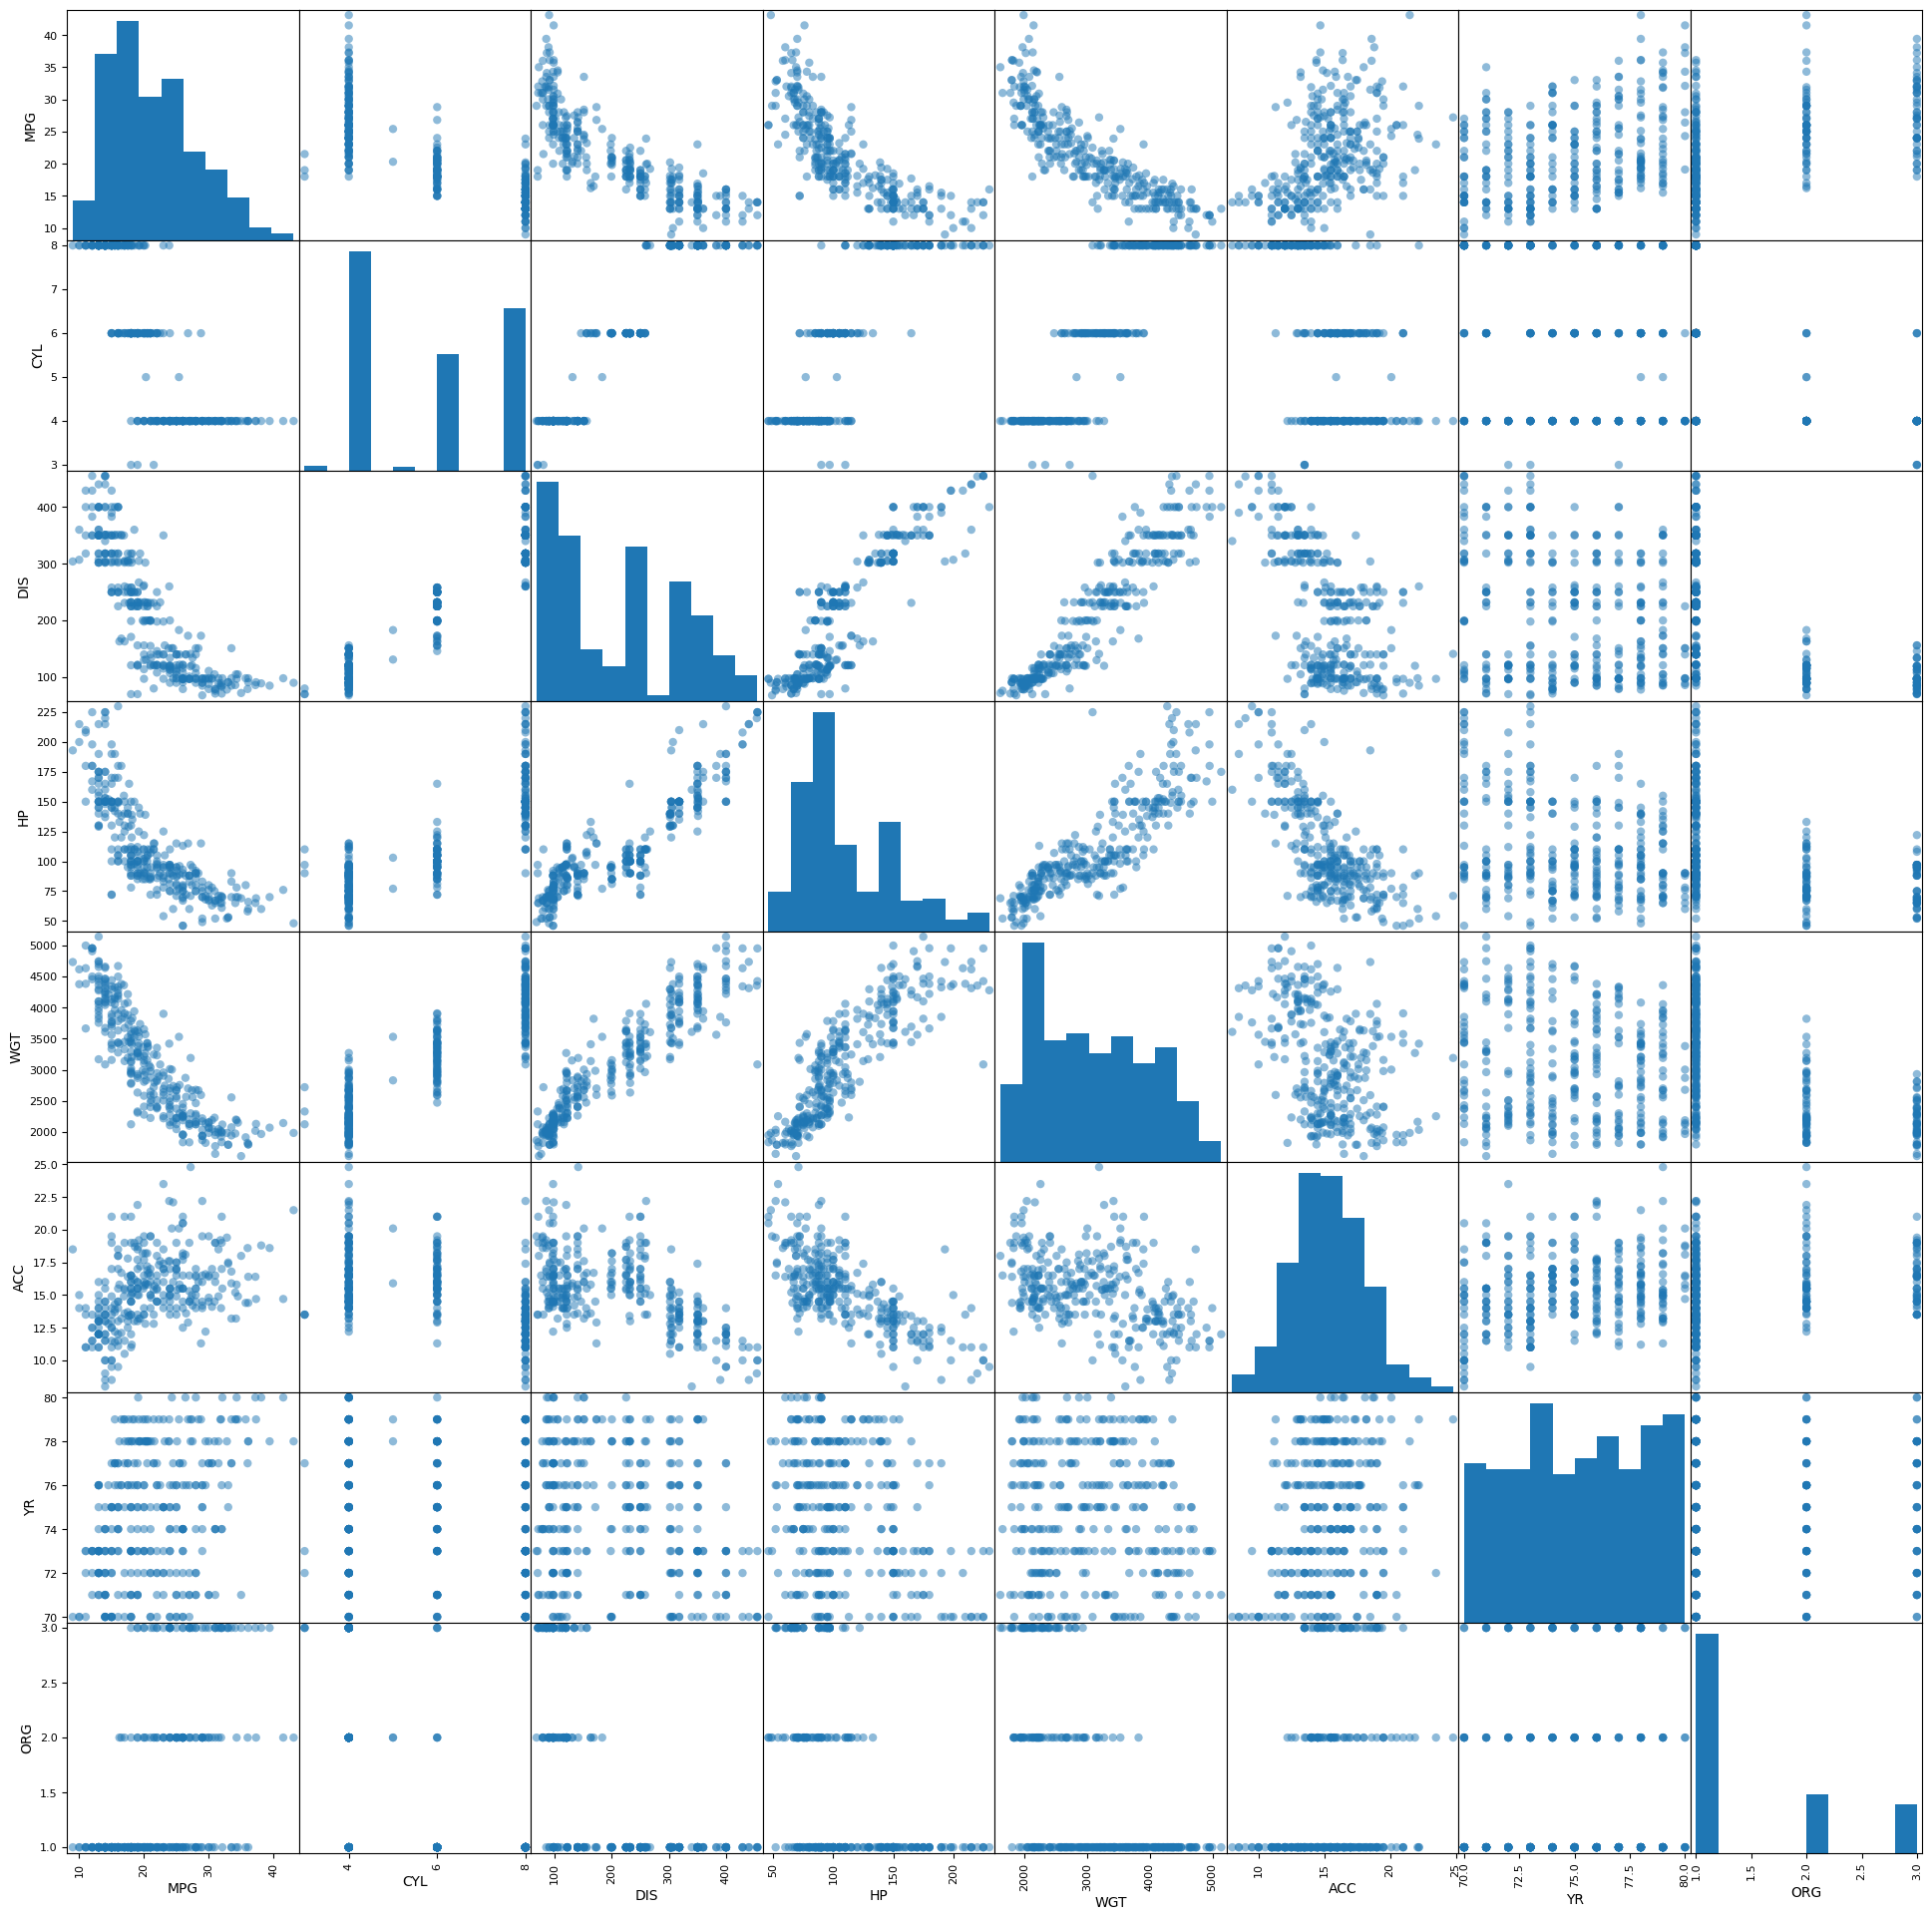

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(24,24), marker = 'o')

Perform the same pair plotting using **seaborn** package. Experiment with displot, jointplot functions in seaborn package

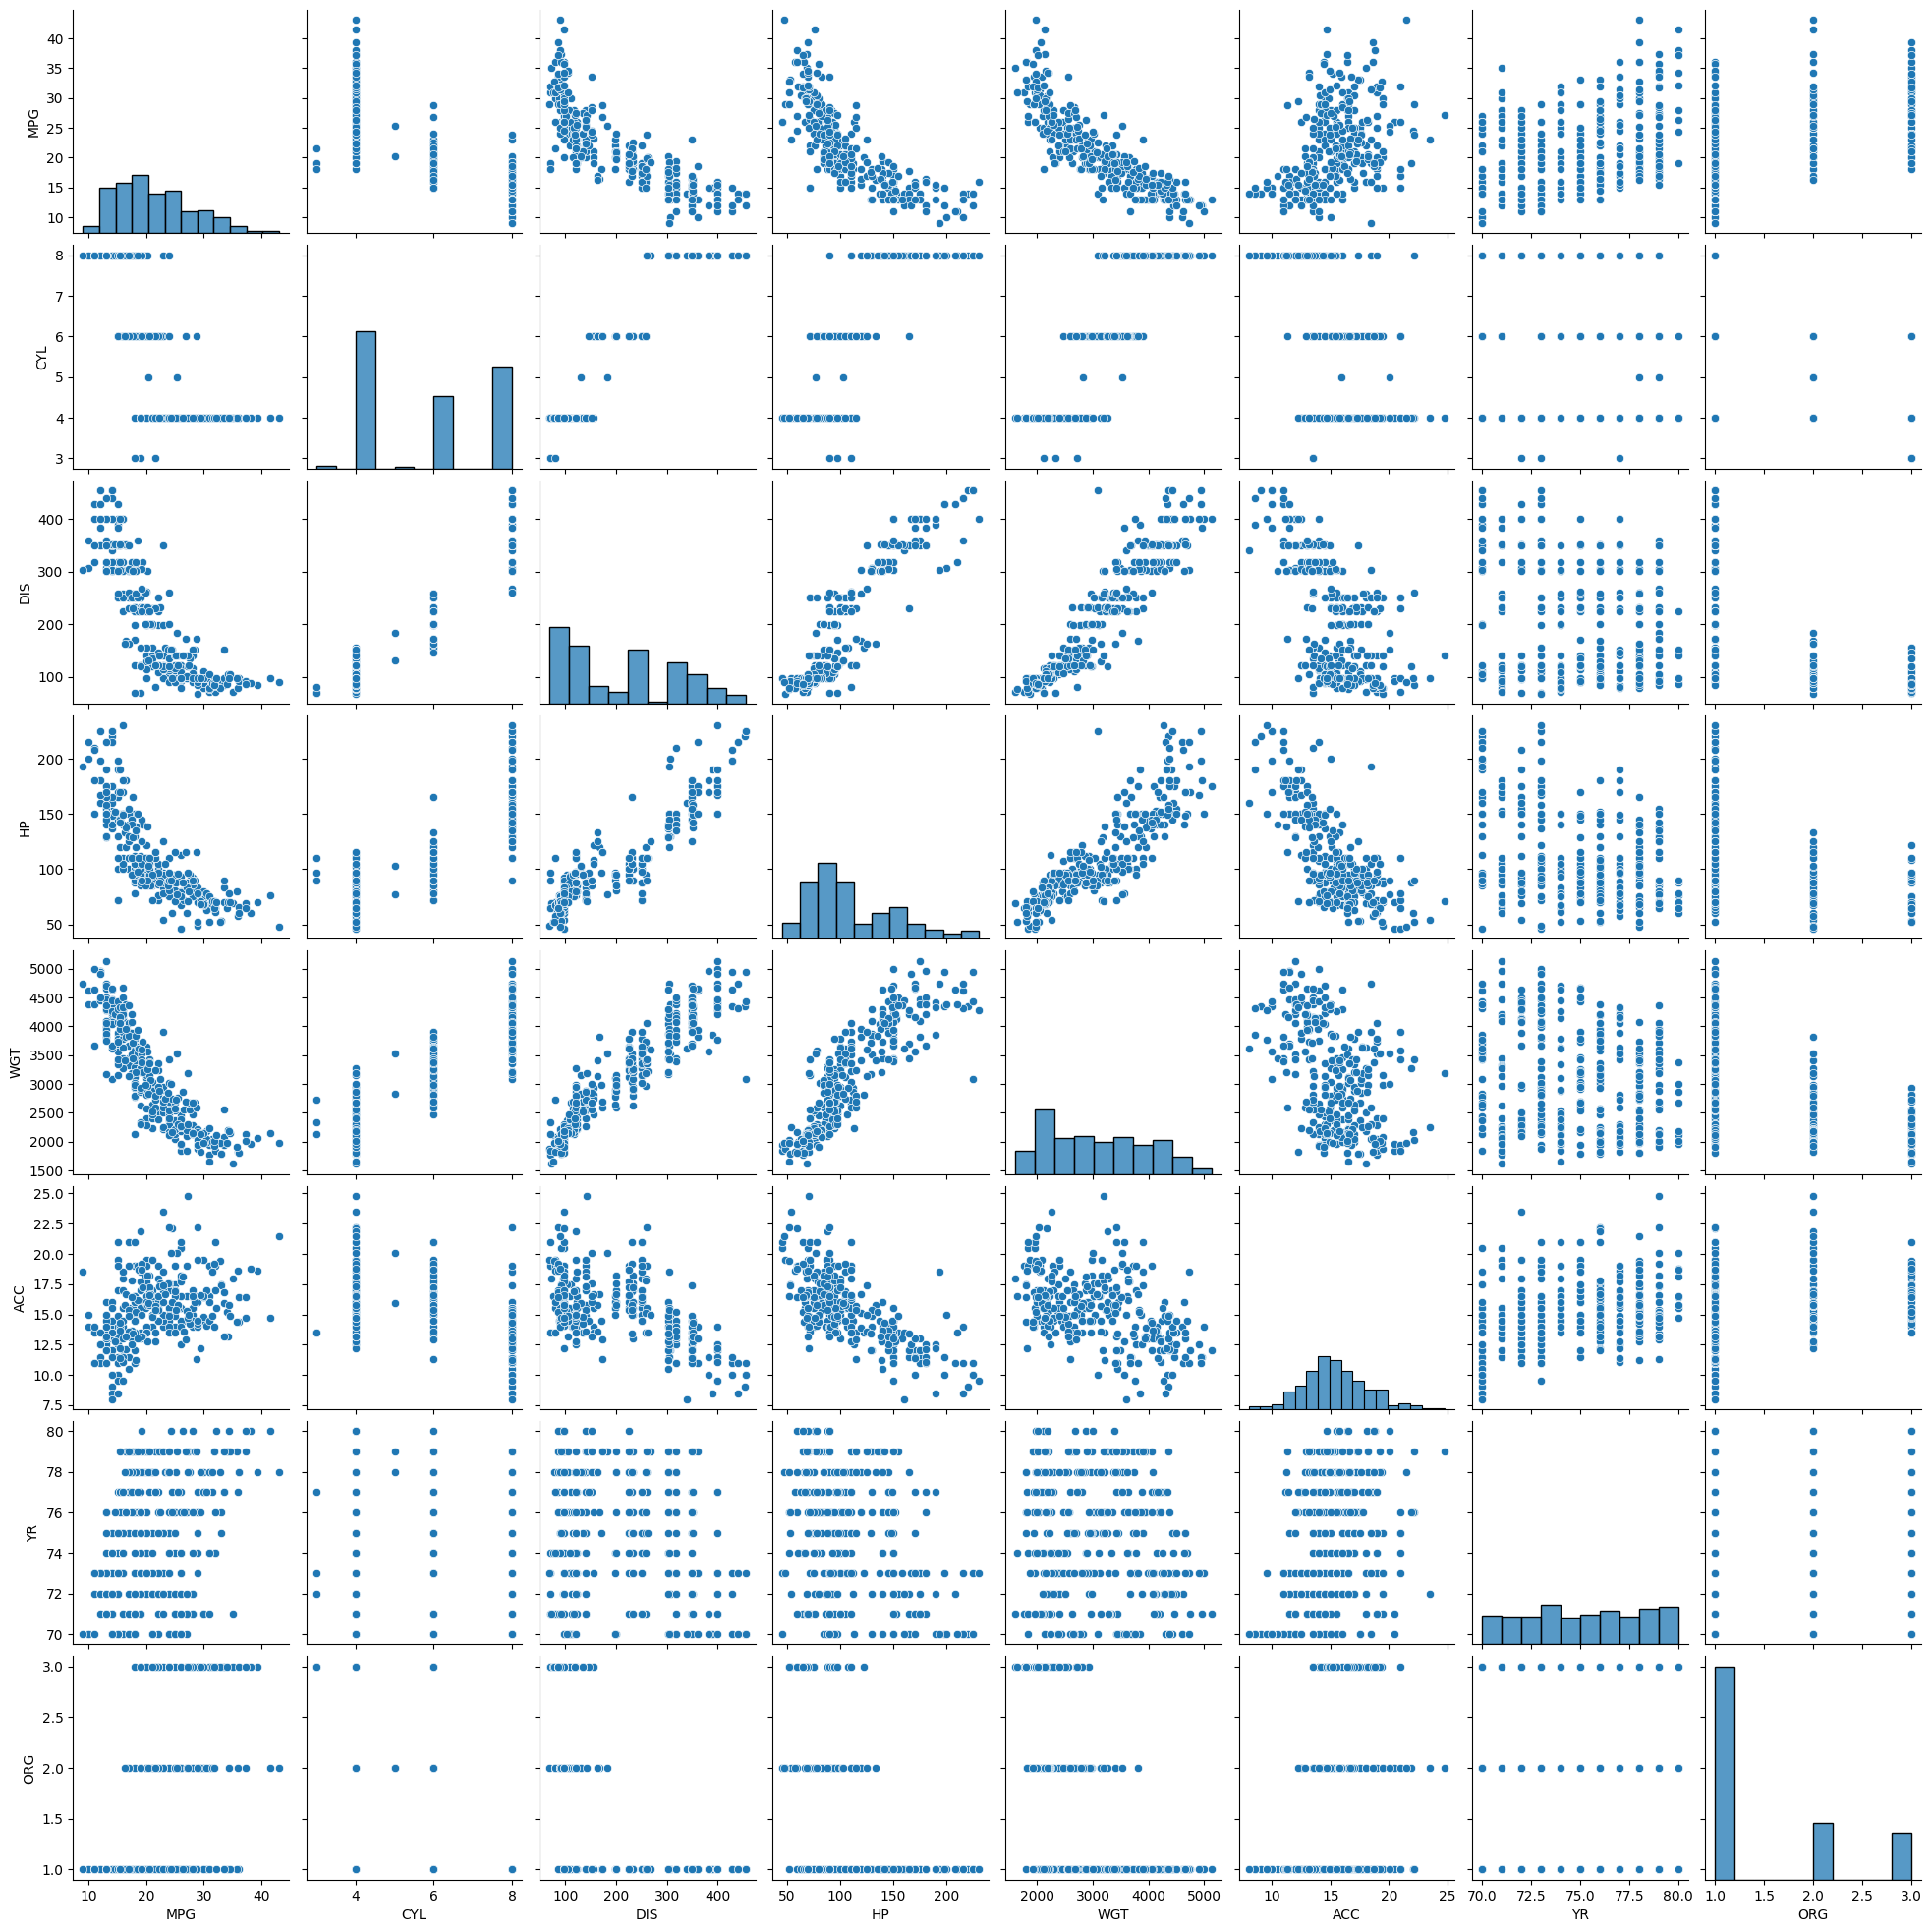

In [ ]:
sns.pairplot(df)

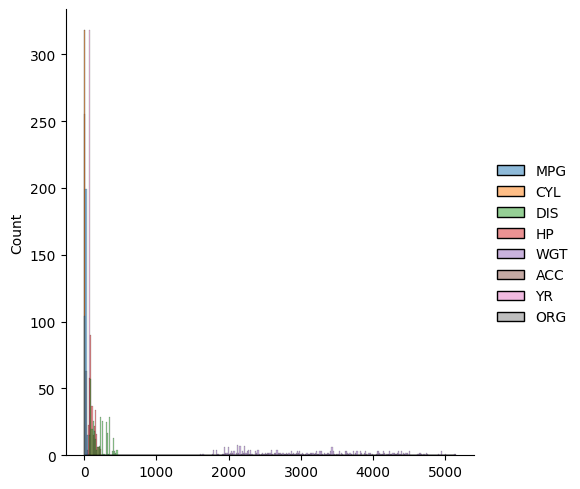

In [ ]:
sns.displot(df)

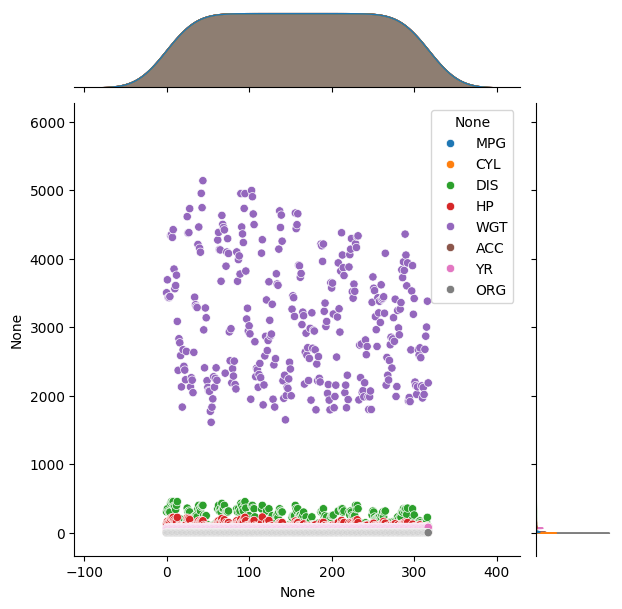

In [ ]:
sns.jointplot(df)

### Looking for Correlations

We first need to drop the categorical features from the dataframe.

In [ ]:
numerical_features = df.drop('NAME', axis=1)
numerical_features

,MPG,CYL,DIS,HP,WGT,ACC,YR,ORG
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
313,28.0,4,151.0,90.0,2678.0,16.5,80,1
314,26.4,4,140.0,88.0,2870.0,18.1,80,1
315,24.3,4,151.0,90.0,3003.0,20.1,80,1
316,19.1,6,225.0,90.0,3381.0,18.7,80,1


Since the dataset is small, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes using the `corr()` function of pandas.

<ipython-input-17-274227cbd63a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

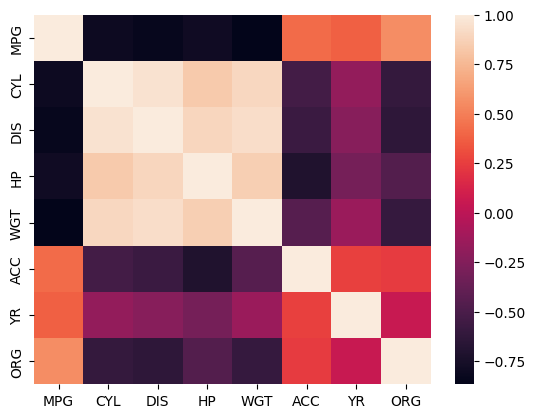

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, color="Red")


## Data processing

After performing EDA on the dataset, the next step is to preprocess the data to make it suitable for the machine learning model.

### Handling missing values

Most machine learning algorithms cannot work with missing features. So, we need to check if there are any missing values in the dataset.

You can use the `isna()` function to check for NaN values.

In [ ]:
df.isna().sum()

MPG     0
CYL     0
DIS     0
HP      2
WGT     0
ACC     0
YR      0
ORG     0
NAME    0
dtype: int64

If you find any NaN Values in the dataframe you have three options:
1. Get rid of the corresponding indices (rows). Use the `dropna()` function of pandas.
2. Get rid of the whole attribute (column). Use the `drop()` function of pandas.
3. Set the values to some value (zero, mean, median, etc.). Use the `fillna()` function of pandas.

Here, we will use the `dropna()` function to drop the rows with missing values.

In [ ]:
df = df.dropna()

Now there should be no NaN values in the dataframe

In [ ]:
df.isna().sum()

MPG     0
CYL     0
DIS     0
HP      0
WGT     0
ACC     0
YR      0
ORG     0
NAME    0
dtype: int64

### Handling categorical features
Linear regression models require numerical values for the features. The categorical features in the dataset need to be encoded as numerical values. There are different ways to encode categorical features, such as:
1. Label Encoding: assigning a numerical value to each category. (n categories -> 1 attribute). This is not a good approach for linear regression models, since the model will assume that two nearby values are more similar than two distant values.
2. One-Hot Encoding: creating a new binary attribute for each category. (n categories -> n binary attributes)
3. Dummy Encoding: creating a new binary attribute for each category and dropping the first category. (n categories -> n-1 binary attributes)

Let's see an example.

In [ ]:
# New dataframe with categorical variables
df_cat = pd.DataFrame({'color': ['red', 'green', 'blue', 'green', 'red', 'blue'],
                       'size': ['S', 'M', 'L', 'M', 'S', 'L'],
                       'price': [10, 20, 30, 25, 15, 35]})
df_cat

,color,size,price
0,red,S,10
1,green,M,20
2,blue,L,30
3,green,M,25
4,red,S,15
5,blue,L,35


In [ ]:
# One-Hot Encoding / Dummy Encoding
# You can use pandas get_dummies() function to perform both one-hot encoding and dummy encoding
df_cat_1hot =  pd.get_dummies(df)
df_cat_1hot

,MPG,CYL,DIS,HP,WGT,ACC,YR,ORG,NAME_amc ambassador brougham,NAME_amc ambassador dpl,...,NAME_volkswagen scirocco,NAME_volkswagen super beetle,NAME_volkswagen type 3,NAME_volvo 144ea,NAME_volvo 145e (sw),NAME_volvo 244dl,NAME_volvo 245,NAME_volvo 264gl,NAME_vw rabbit,NAME_vw rabbit custom
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,28.0,4,151.0,90.0,2678.0,16.5,80,1,0,0,...,0,0,0,0,0,0,0,0,0,0
314,26.4,4,140.0,88.0,2870.0,18.1,80,1,0,0,...,0,0,0,0,0,0,0,0,0,0
315,24.3,4,151.0,90.0,3003.0,20.1,80,1,0,0,...,0,0,0,0,0,0,0,0,0,0
316,19.1,6,225.0,90.0,3381.0,18.7,80,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_cat_dummy = pd.get_dummies(df, drop_first=True)
df_cat_dummy

,MPG,CYL,DIS,HP,WGT,ACC,YR,ORG,NAME_amc ambassador dpl,NAME_amc ambassador sst,...,NAME_volkswagen scirocco,NAME_volkswagen super beetle,NAME_volkswagen type 3,NAME_volvo 144ea,NAME_volvo 145e (sw),NAME_volvo 244dl,NAME_volvo 245,NAME_volvo 264gl,NAME_vw rabbit,NAME_vw rabbit custom
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,28.0,4,151.0,90.0,2678.0,16.5,80,1,0,0,...,0,0,0,0,0,0,0,0,0,0
314,26.4,4,140.0,88.0,2870.0,18.1,80,1,0,0,...,0,0,0,0,0,0,0,0,0,0
315,24.3,4,151.0,90.0,3003.0,20.1,80,1,0,0,...,0,0,0,0,0,0,0,0,0,0
316,19.1,6,225.0,90.0,3381.0,18.7,80,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature selection

We want to predict the `MPG` of the car using linear regression. By analyzing the pair plots and the correlation heatmap choose one or more features (even all) to use.

In [ ]:
# Example
X =  df['MPG']
X = np.array(X)
if len(X.shape) == 1:
    X = X.reshape(-1, 1)

y = df['ACC']
y = np.array(y).reshape(-1, 1)

print(X.shape,y.shape)

assert X.shape[0] == y.shape[0], f"X and y should have the same number of samples, but got {X.shape[0]} and {y.shape[0]}"
assert len(X.shape) == 2, f"X should be a 2D array with shape (n_samples, n_features), but got {X.shape}"
assert len(y.shape) == 2, f"y should be a 2D array with shape (n_samples, 1), but got {y.shape}"

(316, 1) (316, 1)


## Data Splitting
To evaluate the performance of our model, we need to split the dataset into training and testing sets. The training set is used to fit the model, while the testing set is used to evaluate the model's performance on new, unseen data.

We can use the `train_test_split()` function from scikit-learn to split the data into training and testing sets.
The `test_size` parameter specifies the proportion of the data that should be allocated to the testing set. In this case, we will set it to 0.2, which means that 20% of the data will be used for testing.
The `random_state` parameter is used to set the random seed, which ensures that we get the same split every time we run the code. Set it to 42, which is the answer to the ultimate question of life, the universe, and everything.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(252, 1) (64, 1) (252, 1) (64, 1)


### Scaling the data
Linear regression models are sensitive to the scale of the data, and it is essential to scale the data before training the model. There are two common ways to scale the data:
1. Min-max Normalisation: subtract the minimum value and divide by the difference between the maximum and minimum values. (x - min) / (max - min)
2. Standardization: subtract the mean and divide by the standard deviation. (x - mean) / std

We will use the `StandardScaler` class from scikit-learn to standardize the data.
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set using `fit_transform()`. Mean and standard deviation are then stored to be used on the test data using `transform()`.

In [ ]:
# Before scaling
X_train[:5]

array([[19.],
       [14.],
       [12.],
       [15.],
       [18.]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
# After scaling
X_train[:5]

array([[-0.32773643],
       [-1.07664448],
       [-1.3762077 ],
       [-0.92686287],
       [-0.47751804]])

## Linear Regression
We will use the LinearRegression class from scikit-learn to build a linear regression model. The LinearRegression class is a simple and powerful tool for linear regression analysis.



The `LinearRegression` estimator in addition to simple straight-line fits (in case of one feature $x_1$), can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but the general idea is the same: we are trying to find the best fit line (or plane, or hyper-plane) that describes the data.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(copy_X = True).fit(X_train, y_train)
# Create a linear regression model and fit it to the training data
# Your code goes here

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     [1.21887177]
Model intercept: [15.30674603]


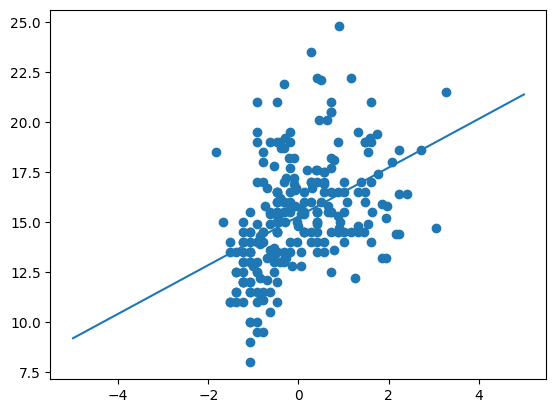

In [ ]:
# In the case of linear regression with one feature, we can plot the model
xfit = np.linspace(-5, 5)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(xfit, yfit)

## Model Evaluation
We will use the mean squared error (MSE), and the mean absolute error (MAE) to evaluate the performance of the model on the testing set.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict the target variable using the testing data
y_pred = model.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Compute the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 6.31
Mean Absolute Error: 2.00


## Task 1
Design a generic linear regression solution using the knowledge acquired so far.
If you are unsure on the solution to this lab, start with a simple working solution (e.g. using for loops).
Then implement the vectorized solution. Compare the two using time() to measure the processing time.

### Fill the following code blocks with your code

In [ ]:
#-----------------------------------------------------
# Hypothesis function
#-----------------------------------------------------

def hyp(X, w):
    '''
    :param X: Design matrix
    :param w: Linear regression weights
    :return: the value of the hypothesis function for each row of X
    '''

    return np.dot(X, w)

In [ ]:
#-----------------------------------------------------
# Cost function
#-----------------------------------------------------
def cost(y, X, w):
    '''
    :param y: target values
    :param X: Design matrix
    :param w: Linear regression weights
    :return: The cost function for the given input data
    '''

    cost_value = np.sum((hyp(X, w) - y) ** 2) / (2 * len(y))
    return cost_value

In [ ]:
#-----------------------------------------------------
# Linear regression solver - Gradient Descent
#-----------------------------------------------------
def linear_regression_fit_gd(y, X, alpha, epsilon=0.001):
    '''
    :param y:
    :param X:
    :param epsilon:
    :return:
    '''
    m, n = X.shape
    w_hat = np.zeros((1, n))  # Initialize weights to zeros as a row vector
    prev_cost = np.inf
    while True:
        gradient = np.dot(X.T, (hyp(X, w_hat.T) - y)) / m  # Transpose w_hat to ensure compatibility
        w_hat -= alpha * gradient
        cost_value = cost(y, X, w_hat.T)  # Transpose w_hat back for cost computation
        if abs(prev_cost - cost_value) < epsilon:
            break
        prev_cost = cost_value
    return w_hat.ravel()

In [ ]:
#-----------------------------------------------------
# Linear regression solver - Normal Equation
#-----------------------------------------------------
def linear_regression_fit_ne(y, X):
    '''
    :param y:
    :param X:
    :param epsilon:
    :return:
    '''

    w_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    return w_hat

Evaluate your functions with the data and check the error using the following code.

In [ ]:
# Train with Gradient Descent
w_hat_gd = linear_regression_fit_gd(y_train, X_train, alpha=0.1)
print('w_hat_gd = ', w_hat_gd)

# Train with Normal Equation
w_hat_ne= linear_regression_fit_ne(y_train, X_train)
print('w_hat_ne = ', w_hat_ne)

y_te_hat = hyp(X_test, w_hat_ne)
print("Predicted values = ", y_te_hat)

# Train and test
print("Error on train (RMSE) = ", np.sqrt(cost(y_train, X_train, w_hat_ne)))
print("Error on test (RMSE) = ", np.sqrt(cost(y_test, X_test, w_hat_ne)))
print("Error on total set (RMSE) = ", np.sqrt(cost(y, X, w_hat_ne)))

w_hat_gd =  [1.13136921]
w_hat_ne =  [[1.21887177]]
Predicted values =  [[ 1.42617708]
 [-0.9471624 ]
 [ 1.42617708]
 [ 0.87848335]
 [-1.49485613]
 [-0.5637768 ]
 [-2.04254986]
 [-1.12972698]
 [-1.12972698]
 [ 1.2436125 ]
 [ 1.2436125 ]
 [ 1.42617708]
 [ 2.15643538]
 [-0.03433953]
 [ 0.87848335]
 [ 2.24771767]
 [-0.2169041 ]
 [ 0.33078962]
 [ 1.2436125 ]
 [-1.49485613]
 [-1.12972698]
 [-0.76459783]
 [ 1.42617708]
 [ 0.20299442]
 [ 0.33078962]
 [ 1.15233021]
 [-0.39946868]
 [ 1.60874165]
 [ 0.14822505]
 [ 2.94146305]
 [ 3.08751471]
 [-1.31229156]
 [ 0.69591877]
 [ 1.70002394]
 [-0.18039119]
 [ 1.51745936]
 [ 0.87848335]
 [-0.9471624 ]
 [-0.16213473]
 [-0.39946868]
 [-1.03844469]
 [-1.49485613]
 [-1.49485613]
 [-0.03433953]
 [-0.39946868]
 [ 0.14822505]
 [-0.03433953]
 [ 0.69591877]
 [ 1.38966416]
 [-0.9471624 ]
 [-0.03433953]
 [-1.49485613]
 [-1.49485613]
 [-0.03433953]
 [-1.49485613]
 [ 1.42617708]
 [ 1.02453501]
 [-1.31229156]
 [ 2.43028224]
 [-0.9471624 ]
 [ 0.71417523]
 [ 0.33078962

## Task 2
1. Perform EDA on another dataset of your choice. You can find a few in the GitHub repo.
2. Build a linear regression model to predict the target variable.
3. Try to use a different number of features and experiment with regularization. You can use the `Ridge`, `Lasso`, and `ElasticNet` classes from scikit-learn.
4. Evaluate the performance of the model using the metrics discussed above.


###Forest fires dataset

In this task I will comparate the results of simple Linear Regression, Ridge, Lasso and Elastic Net from sickit-learn, using the metrics above.



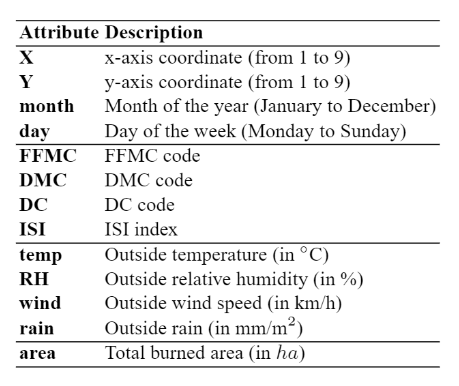

Loading the dataset from personal github repo

In [ ]:
url = 'https://raw.githubusercontent.com/timpdotd/LabIAGI_1950722/main/Esercitazione_5/data/Forest_fires/forestfires.csv'

df = pd.read_csv(url)

### EDA - Exploratory Data Analysis

#### Basic statistics and infos

Let's see a description of the dataset.

In [ ]:
df.shape

(517, 13)

In [ ]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Data correlation

I want to see if there is a correlation between the features.

<ipython-input-44-1ab052e7131b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


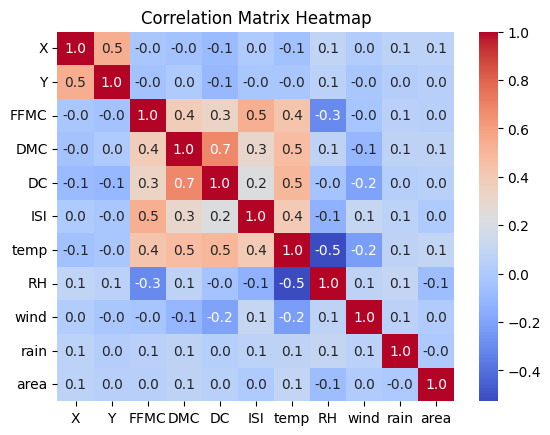

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix Heatmap")
plt.show()

From the map above we can see that FFMC, DMC, DC, ISI and temp have a good correlation between them.

#### Data visualization

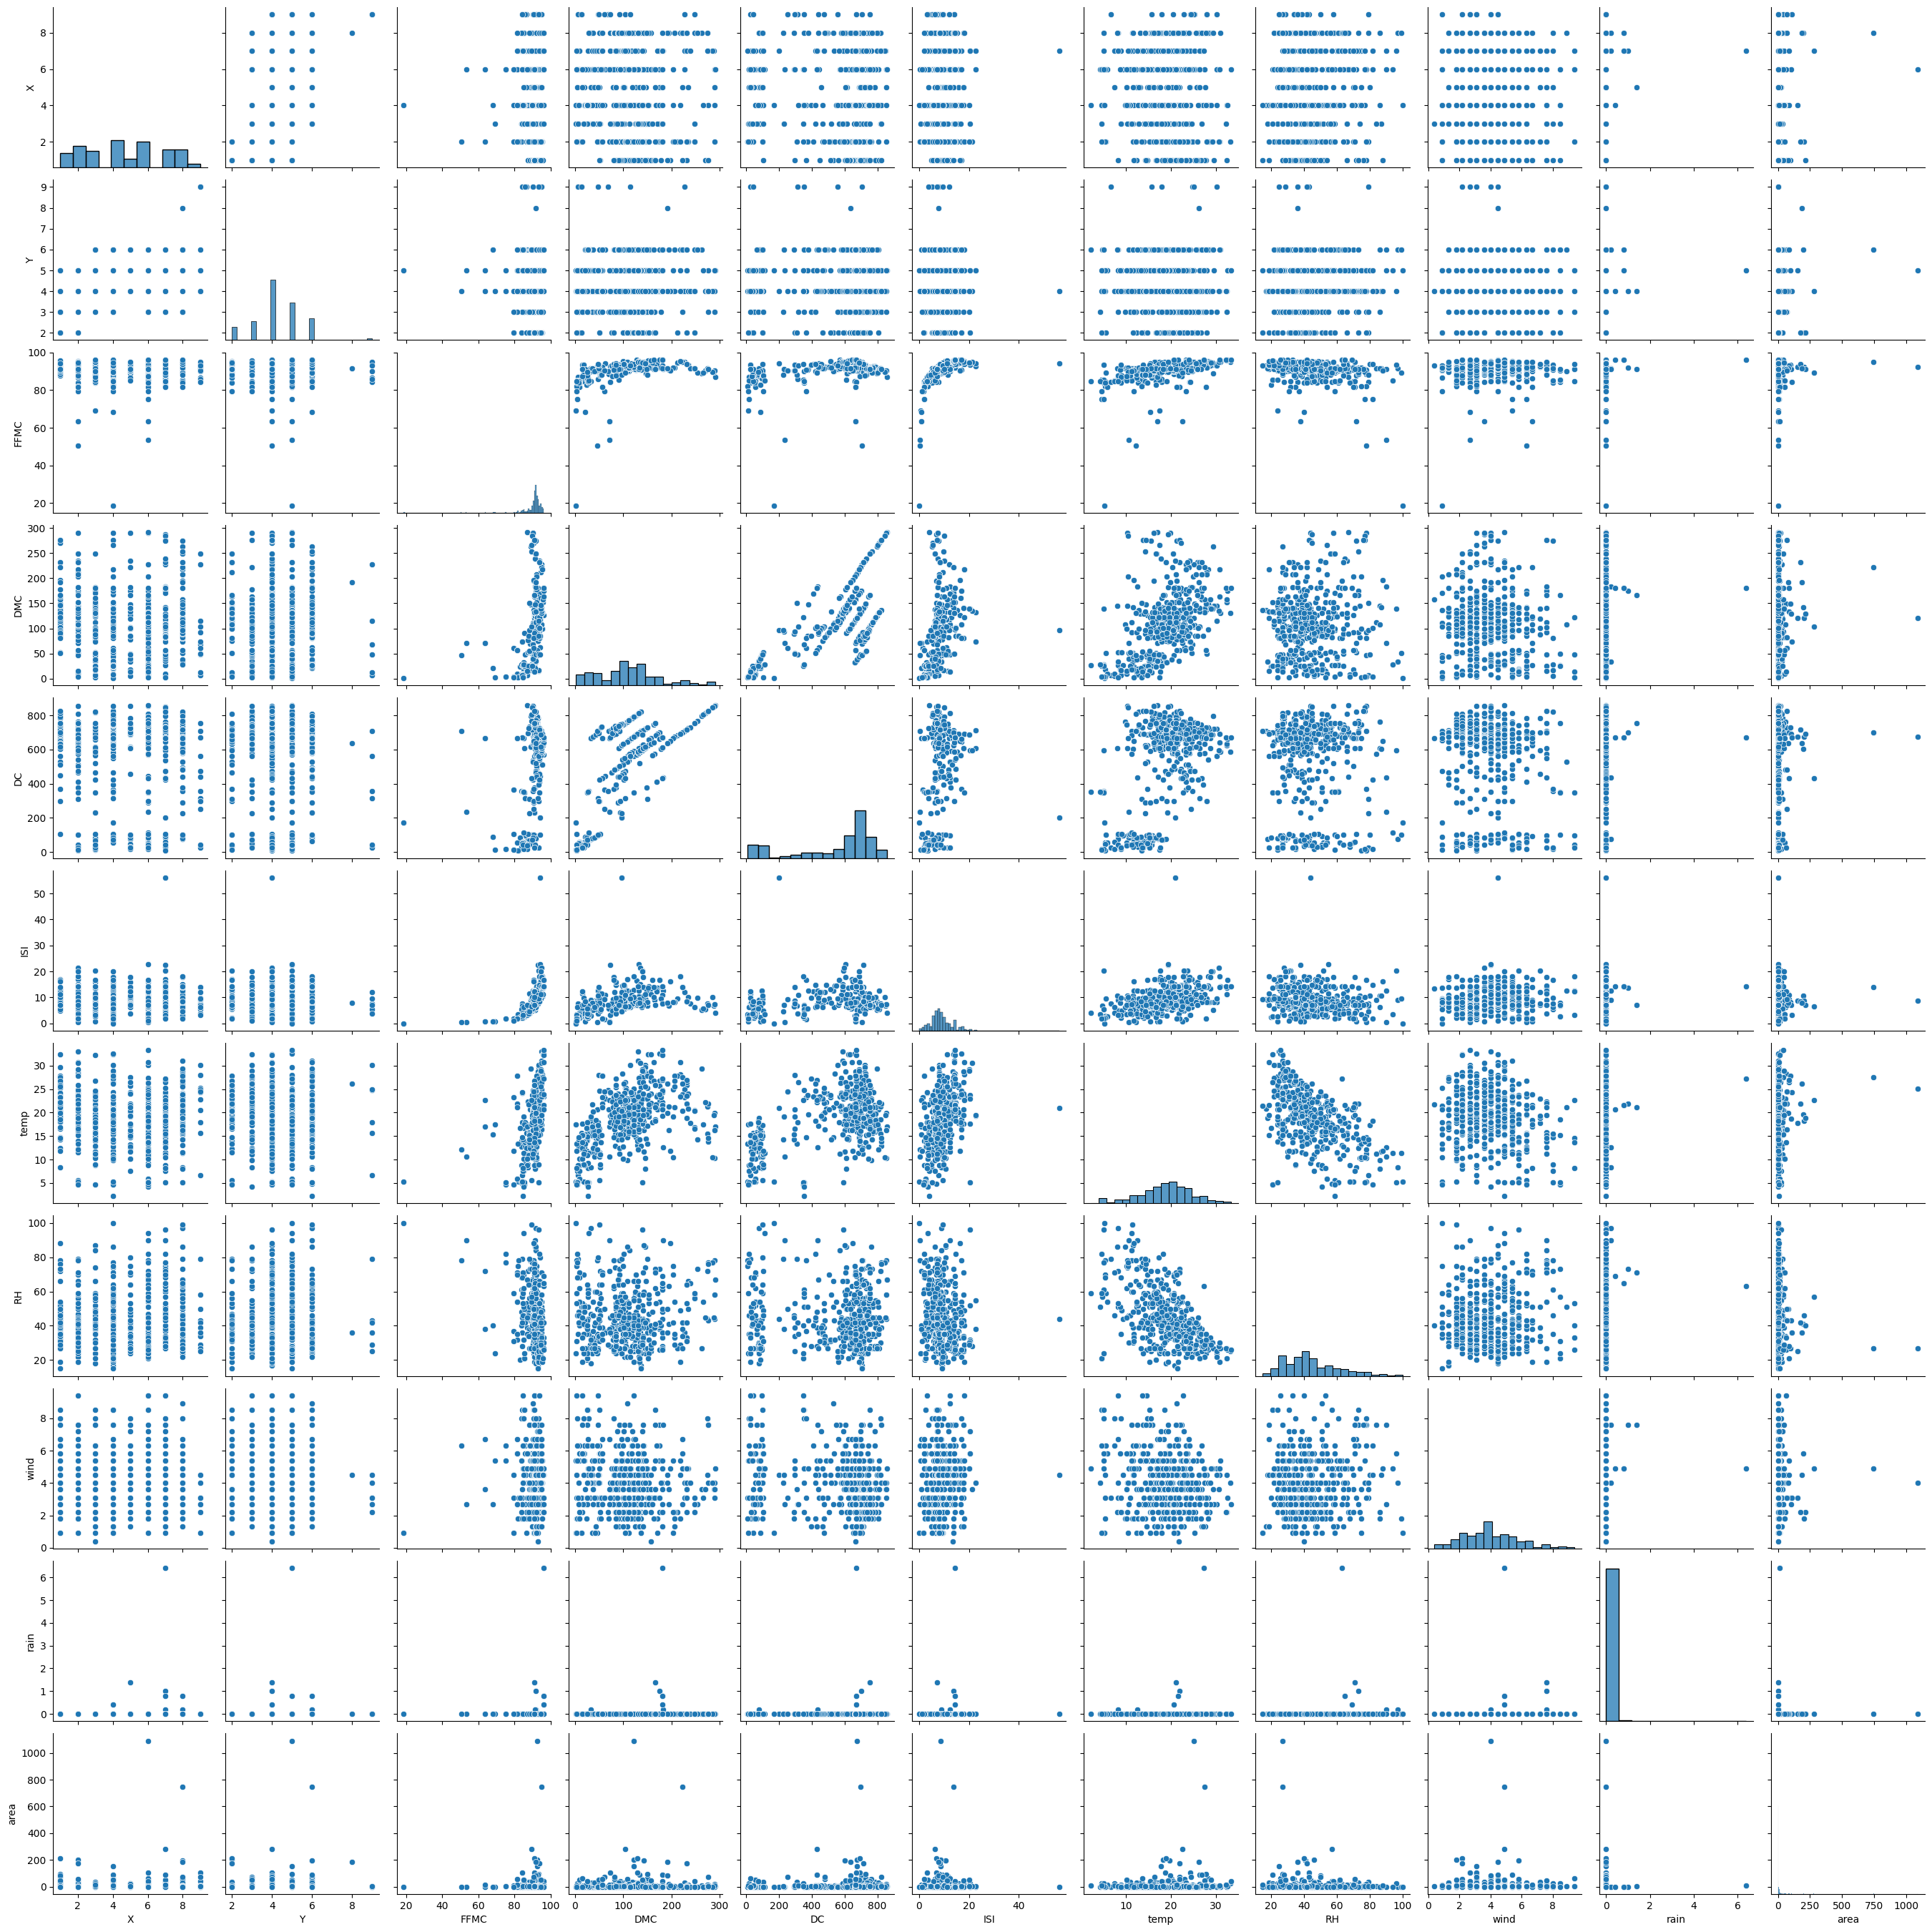

In [ ]:
sns.pairplot(df)

### Data preprocessing

#### Handling categorical features and NaN values

One important thing to do is to see if we have some NaN values and handle them

In [ ]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Fortunetly we do not have NaN values in the dataset.

As we can see from the types below we have two categorical features: month and day, with the type object.

In [ ]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

We will handle this with the dummy encoding given us by Pandas

In [ ]:
df_cat_dummy = pd.get_dummies(df, drop_first=True)
df_cat_dummy

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


### Feature selection and data splitting

I want to see how the outside conditions (temperature, umidity, wind and rain) influence the total burned area in the forest fires. We will see this with 4 types of linear regression:
- Linear Regression
- Ridge
- Lasso
- Elastic Net



In [ ]:
X = df[['wind', 'rain', 'temp', 'RH']]
X = np.array(X)
if len(X) == 1:
  X = X.reshape(-1,1)

y = df['area']
y = np.array(y).reshape(-1,1)

print(f"X: {X.shape}, y = {y.shape}")

assert X.shape[0] == y.shape[0], f"X and y should have the same number of samples, but got {X.shape[0]} and {y.shape[0]}"
assert len(X.shape) == 2, f"X should be a 2D array with shape (n_samples, n_features), but got {X.shape}"
assert len(y.shape) == 2, f"y should be a 2D array with shape (n_samples, 1), but got {y.shape}"

X: (517, 4), y = (517, 1)


Then we will split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train shape: ")
print(f"X: {X_train.shape}, y = {y_train.shape}")
print("Test shape: ")
print(f"X: {X_test.shape}, y = {y_test.shape}")

Train shape: 
X: (413, 4), y = (413, 1)
Test shape: 
X: (104, 4), y = (104, 1)


Now we will also scale the data

In [ ]:
# Before scaling
X_train[:5]

array([[ 1.8,  0. , 24.8, 28. ],
       [ 5.4,  0. , 11.6, 48. ],
       [ 4. ,  0. , 10.6, 30. ],
       [ 4. ,  0. , 22.8, 40. ],
       [ 4. ,  0. , 25.1, 27. ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
# After scaling
X_train[:5]

array([[-1.22220088, -0.06718978,  1.02973922, -0.99798396],
       [ 0.78883085, -0.06718978, -1.22232735,  0.22961805],
       [ 0.00676295, -0.06718978, -1.39293845, -0.87522376],
       [ 0.00676295, -0.06718978,  0.68851701, -0.26142275],
       [ 0.00676295, -0.06718978,  1.08092255, -1.05936406]])

### Preparing a dataset for the metrics

In [ ]:
compare_performances = pd.DataFrame(columns=['Model', 'MSE', 'MAE'])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

### Model: Linear Regression

In [ ]:
model = LinearRegression(copy_X = True).fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) #mse
mae = mean_absolute_error(y_test, y_pred) #mae
intercept = model.intercept_  # Intercept term
coefficients = model.coef_  # Slope coefficients

model_results = pd.DataFrame({'Model': ['Linear regression'], 'MSE': [mse], 'MAE': [mae]})
compare_performances = pd.concat([compare_performances, model_results], ignore_index=True)

### Model: Ridge Regression

In [ ]:
model = Ridge(copy_X = True).fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) #mse
mae = mean_absolute_error(y_test, y_pred) #mae
intercept = model.intercept_  # Intercept term
coefficients = model.coef_  # Slope coefficients

model_results = pd.DataFrame({'Model': ['Ridge regression'], 'MSE': [mse], 'MAE': [mae]})
compare_performances = pd.concat([compare_performances, model_results], ignore_index=True)

### Model: Lasso Regression

In [ ]:
model = Lasso(copy_X = True).fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) #mse
mae = mean_absolute_error(y_test, y_pred) #mae
intercept = model.intercept_  # Intercept term
coefficients = model.coef_  # Slope coefficients

model_results = pd.DataFrame({'Model': ['Lasso regression'], 'MSE': [mse], 'MAE': [mae]})
compare_performances = pd.concat([compare_performances, model_results], ignore_index=True)

### Model: Elastic Net Regression

In [ ]:
model = ElasticNet(copy_X = True).fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) #mse
mae = mean_absolute_error(y_test, y_pred) #mae
intercept = model.intercept_  # Intercept term
coefficients = model.coef_  # Slope coefficients

model_results = pd.DataFrame({'Model': ['Elastic Net'], 'MSE': [mse], 'MAE': [mae]})
compare_performances = pd.concat([compare_performances, model_results], ignore_index=True)

### Final metrics

In [ ]:
compare_performances

,Model,MSE,MAE
0,Linear regression,6609.310291,24.006556
1,Ridge regression,6609.509384,24.005224
2,Lasso regression,6643.317880,23.892320
3,Elastic Net,6649.296049,23.898468
